In [1]:
# Getting Scripts
import sys
import os
import time
import math
import string
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
sys.path.append(os.path.abspath(os.path.join('..', '..', 'scripts')))
from utils import run_brute_force_password_cracking_tests_and_save_results, generate_random_code


# Brute-Force Password Cracking Project

This project demonstrates the brute-force method for cracking PIN codes and alphanumeric passwords. The brute-force approach involves trying all possible combinations of characters until the correct password is found. We will explore three scenarios:

1. **Brute-force for a 4-digit PIN code**.
2. **Brute-force for a 6-digit PIN code**.
3. **Brute-force for alphanumeric codes** (case-sensitive), both 4 and 6 characters long.

For each case, we will:
- Generate random passwords.
- Measure the time taken to crack each password.
- Visualize the time distribution using histograms.

## We Define the functions we would be using for this entire work.

In [2]:




# Code for brute forcing digit only pin codes
def brute_force_pin_code(code: str, length: int):
    start_time = time.time()
    for attempt in range(10 ** length):
        guess = f'{attempt:0{length}d}'
        if guess == code:
            break
    return time.time() - start_time


# Code for brute forcing alphanumeric case sensitive pin codes.
def brute_force_alphanumeric_code(code: str, length: int):
    start_time = time.time()
    characters = string.ascii_letters + string.digits
    for attempt in range(len(characters) ** length):
        guess = ''.join([characters[(attempt // len(characters) ** i) % len(characters)] for i in range(length - 1, -1, -1)])
        if guess == code:
            break
    return time.time() - start_time


# Using Simulation Code for last test case since it would be impractical to perform it manually
def simulated_brute_force(code, code_length):
    base_time = 0.000002
    factor = 62 
    estimated_time = base_time * (factor ** code_length)
    
    # Add slight random variation (up to ±10%)
    variability = random.uniform(0.9, 1.1)
    estimated_time *= variability  

    # Simulate delay (small pause to mimic work)
    time.sleep(random.uniform(0.005, 0.02))  # Varying small delay

    return estimated_time




## We now define the test cases and codes

In [13]:
test_cases=[
    {'func': brute_force_pin_code, 'length': 4, 'alphanumeric': False, 'label': "Digits-Only"},
    {'func': brute_force_pin_code, 'length': 6, 'alphanumeric': False, 'label': "Digits-Only"},
    {'func': brute_force_alphanumeric_code, 'length': 4, 'alphanumeric': True, 'label': "Alphanumerc-Case-Sensitive"},
    {'func': simulated_brute_force, 'length': 6, 'alphanumeric': True, 'label': "Alphanumerc-Case-Sensitive"},
]

In [12]:




for case in test_cases:
    for _ in range(500):
        print(f"Iteration {_+1} / 500")
        code = generate_random_code(case['length'], alphanumeric=case['alphanumeric'])
        run_brute_force_password_cracking_tests_and_save_results(case['func'], case['label'], code, case['length'], save_path=os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data')), f"{case['length']}_{case['label']}_character_password_cracking_log.csv"))



Iteration 1 / 500
Alphanumerc-Case-Sensitive
Code: mUzWfr, Length: 6, Execution Time: 105313.254743 seconds


Results saved to /Users/mac/Desktop/CryptAnalysis/data/6_Alphanumerc-Case-Sensitive_character_password_cracking_log.csv
Iteration 2 / 500
Alphanumerc-Case-Sensitive
Code: TNpRPG, Length: 6, Execution Time: 121912.251394 seconds


Results saved to /Users/mac/Desktop/CryptAnalysis/data/6_Alphanumerc-Case-Sensitive_character_password_cracking_log.csv
Iteration 3 / 500
Alphanumerc-Case-Sensitive
Code: Pzwm7P, Length: 6, Execution Time: 106671.638853 seconds


Results saved to /Users/mac/Desktop/CryptAnalysis/data/6_Alphanumerc-Case-Sensitive_character_password_cracking_log.csv
Iteration 4 / 500
Alphanumerc-Case-Sensitive
Code: jtiHOe, Length: 6, Execution Time: 105550.451992 seconds


Results saved to /Users/mac/Desktop/CryptAnalysis/data/6_Alphanumerc-Case-Sensitive_character_password_cracking_log.csv
Iteration 5 / 500
Alphanumerc-Case-Sensitive
Code: iMqvNO, Length: 6, Execution 

In [14]:
frames = []
for case in test_cases:
    frames.append(pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data')), f"{case['length']}_{case['label']}_character_password_cracking_log.csv")))

tables = [
    f'<div style="display: inline-block; padding: 10px; margin-right: 20px; vertical-align: top; width: 45%;">'
    f'<h3>{test_cases[i]["length"]}-{test_cases[i]["label"]}-Character Password</h3>'
    f'{frame.head().to_html(index=False)}</div>'
    for i, frame in enumerate(frames)
]

# Display the tables side by side with titles and spacing
display(HTML(''.join(tables)))

Length,Type,Code,Time (seconds)
4,Digits-Only,6274,0.017689
4,Digits-Only,2492,0.007071
4,Digits-Only,8885,0.011117
4,Digits-Only,9916,0.007127
4,Digits-Only,93,0.000063
Length,Type,Code,Time (seconds)
6,Digits-Only,898762,1.457033
6,Digits-Only,10750,0.017879
6,Digits-Only,365281,0.849363
6,Digits-Only,547655,0.738724


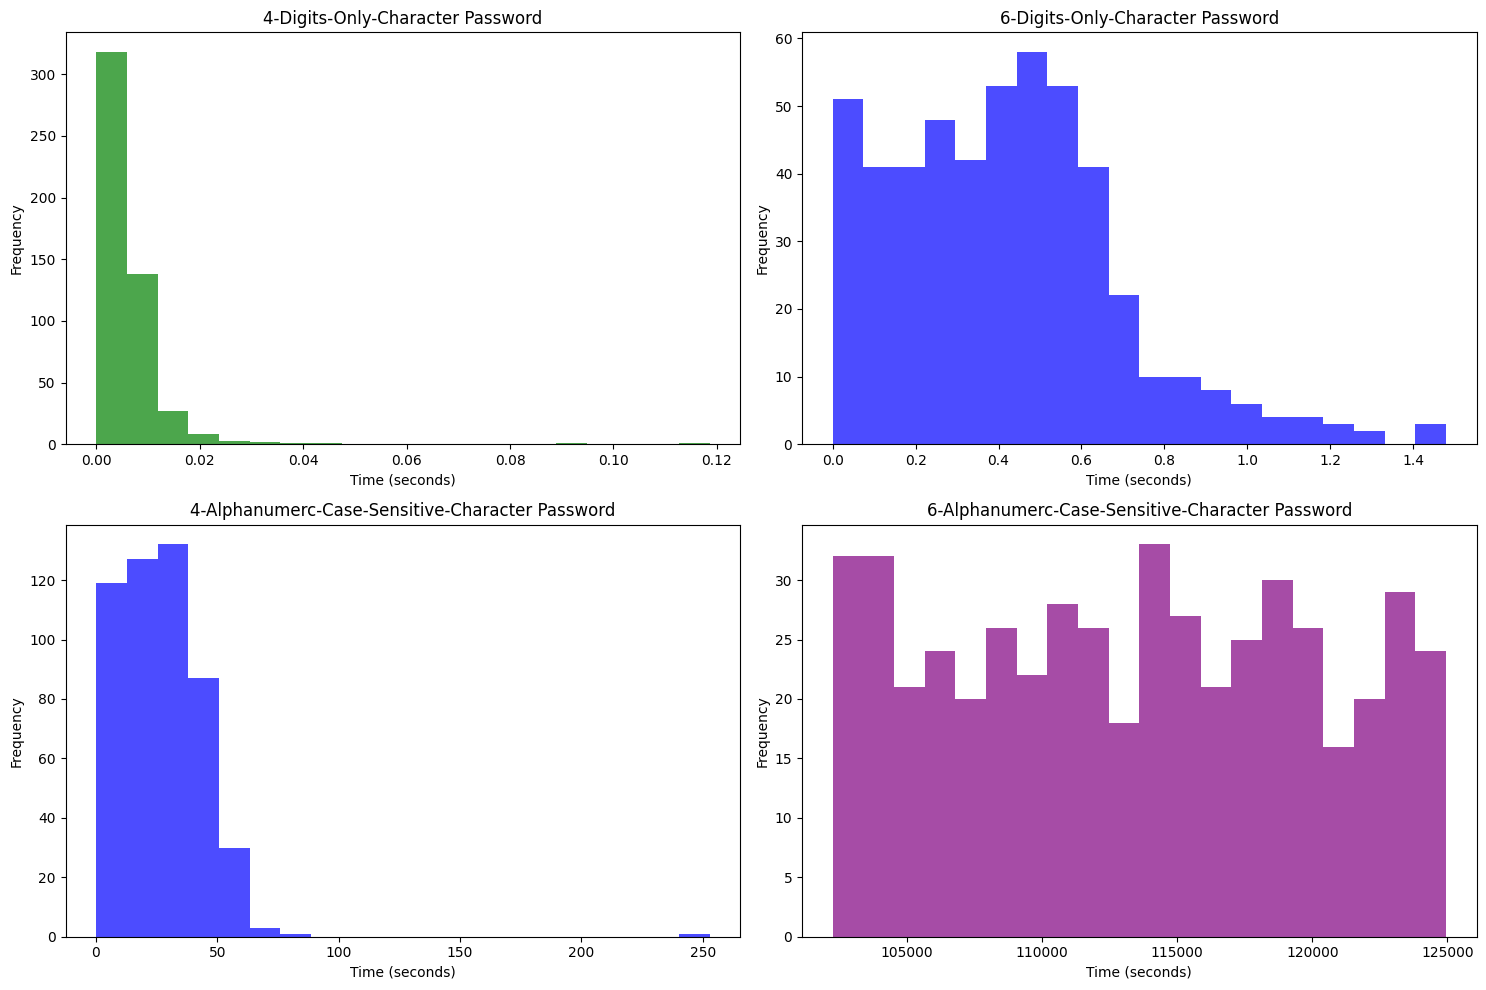

In [22]:


# Determine number of rows and columns for the subplots
n_plots = len(frames)
n_cols = 2  # You can adjust this value based on how many columns you want
n_rows = math.ceil(n_plots / n_cols)

# Create subplots with dynamic rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes to make indexing easier if the grid has multiple rows
axes = axes.flatten()

# Loop through frames and plot
for i, frame in enumerate(frames):
    axes[i].hist(frame['Time (seconds)'], bins=20, color=random.choice(['red', 'blue', 'green', 'purple']), alpha=0.7)
    axes[i].set_xlabel('Time (seconds)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{test_cases[i]["length"]}-{test_cases[i]["label"]}-Character Password')

# Turn off unused axes
for i in range(n_plots, len(axes)):
    axes[i].axis('off')

# Apply tight layout to avoid overlap and adjust spacing
plt.tight_layout()

# Show the plots
plt.show()


## Conclusion

In this project, we explored the brute-force method for password cracking by implementing attacks on 4-digit PINs, 6-digit PINs, and alphanumeric passwords. We measured the time required to find each password and visualized the distribution of cracking times. Our results highlight the exponential growth in complexity as the password length and character set increase.

This experiment reinforces the importance of using longer, more complex passwords, as brute-force attacks become computationally infeasible for strong passwords. It also demonstrates how security mechanisms should incorporate measures such as rate limiting and multi-factor authentication to mitigate brute-force attacks.